<a href="https://colab.research.google.com/github/shmanth/Face_Detection_SSD_Computer_Vision/blob/master/Shamanth_Face_Detection_Using_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# create a directory names model and enter that directory
%mkdir model/
%cd model

mkdir: cannot create directory ‘model/’: File exists
/content/model


In [14]:
# load the pre-trained model and weights
!wget https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt
!wget https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel

--2022-10-14 08:42:30--  https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28092 (27K) [text/plain]
Saving to: ‘deploy.prototxt.txt.1’

deploy.prototxt.txt 100%[===================>]  27.43K  --.-KB/s    in 0.001s  

2022-10-14 08:42:30 (19.1 MB/s) - ‘deploy.prototxt.txt.1’ saved [28092/28092]

--2022-10-14 08:42:30--  https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/georgio

In [15]:
# move out of the directory once the model is loaded
%cd ../

/content


In [16]:
# import the relevant libraries
import numpy as np
import cv2 #openCV

In [17]:
if cv2.__version__ < '4.5.2':
  print("open cv version: ", cv2.__version__)
  print("plase upgrade to latest version")
else:
  print("open cv of latest version")
# if the openCV version is < 4.4.0 update to the latest otherwise skip this step
# !pip install opencv-python==4.5.2.52

open cv of latest version


In [18]:
cv2.__version__

'4.6.0'

In [19]:
# load the serialized model from the local copy in model/
model_cfg = "model/deploy.prototxt.txt"
model_weights = "model/res10_300x300_ssd_iter_140000.caffemodel"

# read the model
detector = cv2.dnn.readNetFromCaffe(model_cfg, model_weights)

In [20]:
# Upload the test image provided into your drive and copy the path
%cp /content/drive/MyDrive/macron.jpg .

test_img = "macron.jpg"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


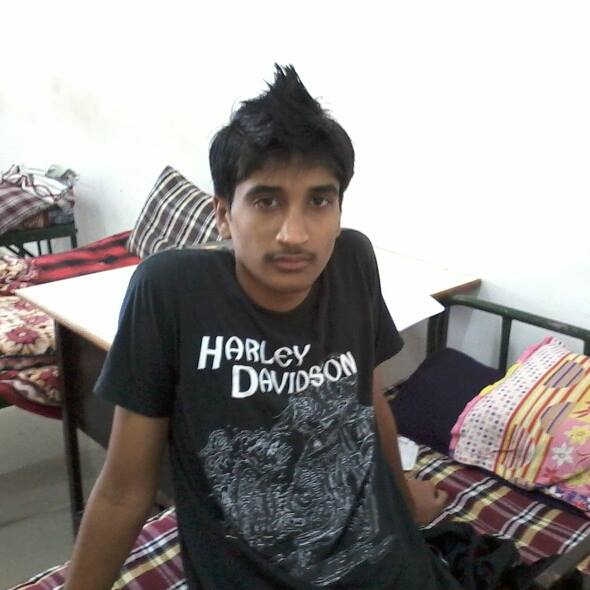

In [21]:
# load the test image and create an image blob
image = cv2.imread(test_img)
(h,w) = image.shape[:2]

# display the image 
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [23]:
# set the intensity scaling factor; 1 in this case, i.e. original image intensities
scale_factor = 1

# set the new dimensions for image resizing to match the network requirements
new_size = (300,300)

# create a blob using OpenCV's DNN functionality and by performing mean subtraction 
# to normalize the input
blob = cv2.dnn.blobFromImage(image, scale_factor, new_size, (127.5, 127.5, 127.5), swapRB=True, crop=False)

# set the blob as input to the network
detector.setInput(blob)

# compute the forward pass - detect faces if any
detections = detector.forward()

detections.shape

(1, 1, 200, 7)

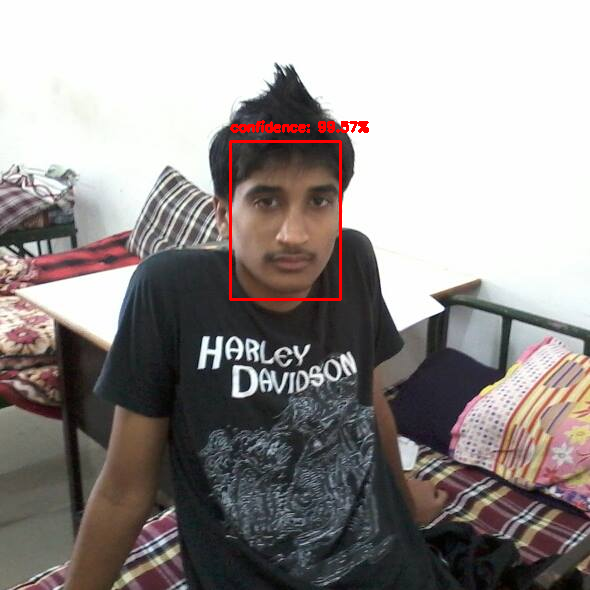

In [28]:
# Declare an array
detections[0][0][0]

# compute the length of the array
len(detections[0][0])

# set the confidence threshold
confidence_threshold = 0.5

# loop over the detections
for i in range(0,detections.shape[2]):

  # extract the confidence (i.e., probability) associated with the prediction
  confidence = detections[0,0,i,2]

  # ignore weak detections
  if confidence > confidence_threshold:
     # compute the (x, y)-coordinates of the bounding box for the detected object
     box = detections[0,0,i,3:7] * np.array([w,h,w,h])
     (startX, startY, endX, endY) = box.astype("int")

     # draw the bounding box of the detected face
     cv2.rectangle(image, (startX,startY), (endX,endY), (0,0,255), 2)

     # print the probability of this detection
     text = "confidence: {:.2f}%".format(confidence * 100)
     y = startY - 10 if startY - 10 > 10 else startY + 10
     cv2.putText(image, text, (startX,y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255), 2)

# show the output image
cv2_imshow(image)